<a href="https://colab.research.google.com/github/yawarabbasmalik/yawarabbasmalik/blob/main/COVID_19%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Python Framworks

In [131]:
#loading dataset
import pandas as pd
import numpy as np
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from pandas import *
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn import tree
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score



### Loading the Dataset and Printing

In [132]:
df = pd.read_csv("/content/covid_19_indonesia_time_series_all.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [133]:
# Confirming the number of records & data type of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [134]:
df.shape

(21759, 38)

In [135]:
# Removing the duplicates if existing
df=df.drop_duplicates()

In [136]:
df.shape

(21759, 38)

The above results show that there exists **422** duplicate value in this dataset

In [137]:
#Finding Missing Values in all columns of dataframe

df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

In [138]:
# We are droping those columns that contains high amount of null values

df =  df.dropna(axis=1)
df.shape

(21759, 28)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21759 entries, 0 to 21758
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      21759 non-null  object 
 1   Location ISO Code         21759 non-null  object 
 2   Location                  21759 non-null  object 
 3   New Cases                 21759 non-null  int64  
 4   New Deaths                21759 non-null  int64  
 5   New Recovered             21759 non-null  int64  
 6   New Active Cases          21759 non-null  int64  
 7   Total Cases               21759 non-null  int64  
 8   Total Deaths              21759 non-null  int64  
 9   Total Recovered           21759 non-null  int64  
 10  Total Active Cases        21759 non-null  int64  
 11  Location Level            21759 non-null  object 
 12  Country                   21759 non-null  object 
 13  Continent                 21759 non-null  object 
 14  Total 

In [140]:
#Dropping Date column as we are not working on timeseries data.

df = df.drop(['Date', 'Location ISO Code','Location', 'Location Level', 'Country', 'Continent', 'Case Fatality Rate', 'Case Recovered Rate'], axis=1)
df.head()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
0,2,0,0,2,39,20,41,-22,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18
1,2,0,0,2,41,20,41,-20,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18
2,2,0,0,2,2,0,0,2,416,7230,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00
3,1,0,0,1,2,0,3,-1,10,169,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00
4,2,0,0,2,43,20,41,-18,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18


In [141]:
df.shape

(21759, 20)

In [142]:
# SPLIT DATA
X = df.drop('New Deaths', axis = 1)
y = df['New Deaths']

In [143]:
scaler = MinMaxScaler() 
df1 = scaler.fit_transform(X)

In [144]:
df_scaled = pd.DataFrame(df1, columns=X.columns,index=X.index)
print(df_scaled)


       New Cases  New Recovered  New Active Cases   Total Cases  Total Deaths  \
0       0.000035       0.000000          0.411955  8.925967e-06      0.000139   
1       0.000035       0.000000          0.411955  9.395754e-06      0.000139   
2       0.000035       0.000000          0.411955  2.348939e-07      0.000000   
3       0.000018       0.000000          0.411939  2.348939e-07      0.000000   
4       0.000035       0.000000          0.411955  9.865542e-06      0.000139   
...          ...            ...               ...           ...           ...   
21754   0.000035       0.000000          0.411955  8.154105e-03      0.007341   
21755   0.000070       0.000000          0.411987  2.110474e-02      0.014959   
21756   0.000070       0.000000          0.411987  1.407860e-02      0.021347   
21757   0.000070       0.000020          0.411971  2.490908e-02      0.020082   
21758   0.004317       0.006717          0.410466  1.000000e+00      1.000000   

       Total Recovered  Tot

In [145]:
X = df_scaled

In [146]:
#Train_test_split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16319, 19)
(5440, 19)
(16319,)
(5440,)


In [147]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [148]:
# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION 
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)
    
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


In [149]:
model = [LinearRegression(), SVR(), DecisionTreeRegressor()]
for i in model:
    predict_model(i, X_train,X_test, y_train, y_test)

-----------LinearRegression()-----------
MAE: 1.020707048294365e-12
MSE: 2.444194491589716e-24
RMSE: 1.5633919827061018e-12
R2 Square 1.0
__________________________________
-----------SVR()-----------
MAE: 8.177667901618134
MSE: 5078.393016983847
RMSE: 71.26284457544371
R2 Square 0.1440433787798252
__________________________________
-----------DecisionTreeRegressor()-----------
MAE: 0.8332720588235294
MSE: 52.201286764705884
RMSE: 7.225045796720314
R2 Square 0.9912015401539362
__________________________________


In [150]:
#Computing Variable Importance
model=DecisionTreeRegressor()
 
model.fit(X,y)

feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
best_features = feature_importances.sort_values('feature_importance',ascending=False)
best_features.head()

,features,feature_importance
6,Total Active Cases,0.697867
1,New Recovered,0.152554
16,New Deaths per Million,0.116420
4,Total Deaths,0.017277
7,Total Regencies,0.004875


In [151]:
result = pd.concat([X, y], axis=1)
display(result)

,New Cases,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,New Deaths
0,0.000035,0.000000,0.411955,8.925967e-06,0.000139,9.986166e-06,0.003962,0.000000,0.000000,0.000000,0.038549,1.000000,0.237537,0.191938,0.000134,0.000045,0.00000,0.001199,0.001173,0
1,0.000035,0.000000,0.411955,9.395754e-06,0.000139,9.986166e-06,0.003966,0.000000,0.000000,0.000000,0.038549,1.000000,0.237537,0.191938,0.000134,0.000047,0.00000,0.001199,0.001173,0
2,0.000035,0.000000,0.411955,2.348939e-07,0.000000,0.000000e+00,0.004004,1.000000,1.000000,1.000000,1.000000,0.007948,0.407098,0.611484,0.000007,0.000000,0.00000,0.000000,0.000000,0
3,0.000018,0.000000,0.411939,2.348939e-07,0.000000,7.306950e-07,0.003999,0.021687,0.017395,0.045067,0.020510,0.003749,0.117136,0.712270,0.000119,0.000004,0.00000,0.000000,0.000000,0
4,0.000035,0.000000,0.411955,9.865542e-06,0.000139,9.986166e-06,0.003969,0.000000,0.000000,0.000000,0.038549,1.000000,0.237537,0.191938,0.000134,0.000050,0.00000,0.001199,0.001173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,0.000035,0.000000,0.411955,8.154105e-03,0.007341,8.175503e-03,0.004162,0.024096,0.017673,0.006903,0.007536,0.011122,0.660773,0.770219,0.000564,0.164946,0.00000,0.260571,0.260561,0
21755,0.000070,0.000000,0.411987,2.110474e-02,0.014959,2.133751e-02,0.004160,0.026506,0.018787,0.021578,0.018413,0.007521,0.085066,0.606760,0.000534,0.204349,0.00000,0.254182,0.254172,0
21756,0.000070,0.000000,0.411987,1.407860e-02,0.021347,1.384180e-02,0.004063,0.028916,0.027414,0.047451,0.028613,0.004969,0.173719,0.423464,0.000363,0.091557,0.00000,0.243621,0.243611,0
21757,0.000070,0.000020,0.411971,2.490908e-02,0.020082,2.510205e-02,0.004165,0.057831,0.056499,0.037739,0.053779,0.011958,0.051248,0.842443,0.000200,0.089490,0.00000,0.126612,0.126597,0


In [154]:
result.to_csv('Covid_Data_Preprocessed.csv', Index = "False")

In [37]:
df1

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
0,2,0,0,2,39,20,41,-22,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18
1,2,0,0,2,41,20,41,-20,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18
2,2,0,0,2,2,0,0,2,416,7230,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00
3,1,0,0,1,2,0,3,-1,10,169,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00
4,2,0,0,2,43,20,41,-18,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,2,0,0,2,34715,1056,33566,93,11,171,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97
21755,4,0,0,4,89849,2152,87605,92,12,179,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99
21756,4,0,0,4,59937,3071,56830,36,13,241,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37
21757,4,0,1,3,106045,2889,103061,95,25,450,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42


In [38]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaled_values

array([[0.00000000e+00, 0.00000000e+00, 4.11954973e-01, ...,
        0.00000000e+00, 1.19949413e-03, 1.17340287e-03],
       [0.00000000e+00, 0.00000000e+00, 4.11954973e-01, ...,
        0.00000000e+00, 1.19949413e-03, 1.17340287e-03],
       [0.00000000e+00, 0.00000000e+00, 4.11954973e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.11986998e-01, ...,
        0.00000000e+00, 2.43621168e-01, 2.43611473e-01],
       [0.00000000e+00, 2.04783748e-05, 4.11970985e-01, ...,
        0.00000000e+00, 1.26611820e-01, 1.26597132e-01],
       [3.86660222e-03, 6.71690695e-03, 4.10465805e-01, ...,
        4.70219436e-04, 3.53642160e-01, 3.53650587e-01]])

       New Deaths  New Recovered  New Active Cases   Total Cases  \
0        0.000000       0.000000          0.411955  8.925967e-06   
1        0.000000       0.000000          0.411955  9.395754e-06   
2        0.000000       0.000000          0.411955  2.348939e-07   
3        0.000000       0.000000          0.411939  2.348939e-07   
4        0.000000       0.000000          0.411955  9.865542e-06   
...           ...            ...               ...           ...   
21754    0.000000       0.000000          0.411955  8.154105e-03   
21755    0.000000       0.000000          0.411987  2.110474e-02   
21756    0.000000       0.000000          0.411987  1.407860e-02   
21757    0.000000       0.000020          0.411971  2.490908e-02   
21758    0.003867       0.006717          0.410466  1.000000e+00   

       Total Deaths  Total Recovered  Total Active Cases  Total Regencies  \
0          0.000139     9.986166e-06            0.003962         0.000000   
1          0.000139     9.986

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test \
  = train_test_split(df_scaled, y, test_size=0.30)

In [47]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)
print(mse^.5)

In [52]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt = DecisionTreeRegressor(random_state = 0) .fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt.predict(X_test)

In [53]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 33.21982230392157
Mean Squared Error: 67764.10493259804
Root Mean Squared Error: 260.31539511254044


ValueError: ignored

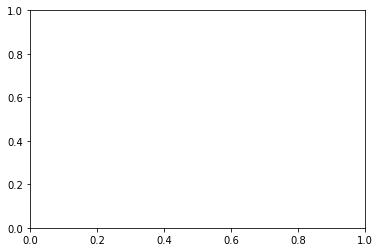

In [64]:
hist(df['nor_new_cases'])

In [62]:
df['nor_new_cases']=np.log(df['New Cases'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
nor_new_cases

0        0.693147
1        0.693147
2        0.693147
3        0.000000
4        0.693147
           ...   
21754    0.693147
21755    1.386294
21756    1.386294
21757    1.386294
21758    5.501258
Name: New Cases, Length: 21759, dtype: float64

In [43]:
# #Apply the models on correlation
# # SVM With Linear
# from sklearn.svm import SVC
# SVM = SVC(kernel='linear')
# scoring = ['accuracy','precision_weighted', 'recall_weighted','f1_weighted','roc_auc']
# scores1 = cross_validate(SVM,df_scaled,y, cv=10,scoring=scoring)
# # # print(scores)
# # # scores.keys()
# Accuracy1 = scores1['test_accuracy'].mean()
# Precision1 = scores1['test_precision_weighted'].mean()
# Recall1 = scores1['test_recall_weighted'].mean()
# F1Score1= scores1['test_f1_weighted'].mean()
# Roc_AUC1 = scores1['test_roc_auc'].mean()
# print("**********SVM with Linear kernal,*********")
# print("Accuracy,",round(Accuracy1,4))
# print("Precision,",round(Precision1,4))
# print("Recall,",round(Recall1,4))
# print("F1-Score,",round(F1Score1,4))
# print("Roc_Auc,",round(Roc_AUC1,4))


In [44]:
# #Random Forest
# RF = RandomForestClassifier(n_estimators = 35, criterion = 'entropy')
# scoring = ['accuracy','precision_weighted', 'recall_weighted','f1_weighted','roc_auc']
# scores = cross_validate(RF,df_scaled,y, cv=10,scoring=scoring)
# # # print(scores)
# # print(scores.keys())
# Accuracy = scores['test_accuracy'].mean()
# Precision = scores['test_precision_weighted'].mean()
# Recall = scores['test_recall_weighted'].mean()
# F1Score= scores['test_f1_weighted'].mean()
# Roc_AUC = scores['test_roc_auc'].mean()
# print("**********Random Forest,*********")
# print("Accuracy,",round(Accuracy,4))
# print("Precision,",round(Precision,4))
# print("Recall,",round(Recall,4))
# print("F1-Score,",round(F1Score,4))
# print("Roc_Auc,",round(Roc_AUC,4))



In [45]:

# DT= tree.DecisionTreeClassifier()
# scoring = ['accuracy','precision_weighted', 'recall_weighted','f1_weighted']
# scores = cross_validate(DT,df_scaled,y, cv=10,scoring=scoring)
# # # print(scores)
# # # scores.keys()
# Accuracy = scores['test_accuracy'].mean()
# Precision = scores['test_precision_weighted'].mean()
# Recall = scores['test_recall_weighted'].mean()
# F1Score= scores['test_f1_weighted'].mean()
# # print("**********Decsion Tree,*********")
# print(round(Accuracy,4))
# print("Precision,",round(Precision,4))
# print("Recall,",round(Recall,4))
# print("F1-Score,",round(F1Score,4))





In [46]:
# lr = LogisticRegression(solver='lbfgs')
# scoring = ['accuracy','precision_weighted', 'recall_weighted','f1_weighted']
# scores = cross_validate(lr,df_scaled,y, cv=10,scoring=scoring)
# # # print(scores)
# # # scores.keys()
# Accuracy = scores['test_accuracy'].mean()
# Precision = scores['test_precision_weighted'].mean()
# Recall = scores['test_recall_weighted'].mean()
# F1Score= scores['test_f1_weighted'].mean()
# # print("**********Logistic Regression,*********")
# print(round(Accuracy,4))
# print("Precision,",round(Precision,4))
# print("Recall,",round(Recall,4))
# print("F1-Score,",round(F1Score,4))
